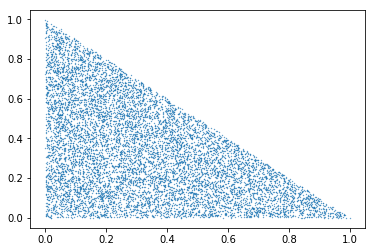

In [2]:
import numpy as np
import random
import math

from numpy.linalg import norm, inv
import matplotlib.pyplot as plt

def point_on_triangle(pt1, pt2, pt3):
    s, t = sorted([random.random(), random.random()])
    return (s * pt1[0] + (t-s)*pt2[0] + (1-t)*pt3[0],
            s * pt1[1] + (t-s)*pt2[1] + (1-t)*pt3[1])

pt1 = (1, 0)
pt2 = (0, 1)
pt3 = (0, 0)
points = [point_on_triangle(pt1, pt2, pt3) for _ in range(10000)]

x, y = zip(*points)
plt.scatter(x, y, s=0.1)
plt.show()


In [5]:
random_point = point_on_triangle(pt1, pt2, pt3)

In [6]:
random_point

(0.03633460496285523, 0.055027930933087665)

In [18]:
#Checks whether the new obtained weight is within the domain or not

def isInsideDomain(x, y):
    if( (x+y)< 1 and (x>0) and (y>0)): 
        return True
    else: 
        return False
    
    
def drawGraph(wx, wy, i, energy):
    plt.plot(wx, wy)
    
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    
    plt.title('Weights Trajectory')
    plt.show()
    
    x=[]
    for j in range(0,i+1):
        x.append(j)
    plt.plot(x, energy)
    plt.xlabel('Iterations')
    plt.ylabel('Energy')
    
    plt.title('Energy Trajectory')
    
def f(w):
    y = - math.log(1-w[0]-w[1]) - math.log(w[0]) - math.log(w[1])  
    return y


    

In [11]:
#testing cell

test = point_on_triangle(pt1, pt2, pt3)
test

(0.0070700955900036, 0.0006545305343319541)

In [16]:
def grad_descent(w0, eta):
    eps = math.pow(10,-4) #eps=  threshold
    i = 0 #count number of iterations
    w0 = np.array(w0)
    w = w0
    w_old = w0 - 10*eps
    init_f = f(w0[:])
    fn = [init_f]
    w_x = [w0[0]]
    w_y = [w0[1]]
    
    while(norm(w-w_old)>eps):
        i = i+1
        w_old = w
        dfdx = (1/(1-w_old[0]-w_old[1]))-(1/w_old[0])
        dfdy = (1/(1-w_old[0]-w_old[1]))-(1/w_old[1])
        g = np.asarray([dfdx , dfdy])  #g = Gradient
        w = w - (eta*g) # weight updation
        print('new w is ', w)
        #To check if new weights lie in domain D
        if (isInsideDomain(w[0],w[1])):
            w_x.append(w[0])
            w_y.append(w[1])
            fn.append(f(w[:]))
            
        #If weights don't lie in D, restart Gradient Descent with new initial weights and learning rate
        else:
            print("Weights not inside domain!\n Restartig GD:")
            a = point_on_triangle(pt1, pt2, pt3)
            x = a[0]
            y = a[1]
            w0 = [x, y]
            print("Initial weights:",w0)
            eta = float(input("Enter new smaller learning rate:"))
            grad_descent(w0,eta)
    return w_x,w_y,i,w,fn

    
a = point_on_triangle(pt1, pt2, pt3)
x = a[0]
y = a[1]
w0 = [0.08685661909450604, 0.4570693848644634]
print("Initial weights:",w0)
eta = float(input("Enter the learning rate:"))
w_x,w_y,i,w,fn = grad_descent(w0,eta)
print("No. of Iterations:",i)
#print("x of w=",w_x)
#print("y of w=",w_y)
print("NEw final weights:",w)
#print("Energy=",fn)


Initial weights: [0.08685661909450604, 0.4570693848644634]
Enter the learning rate:0.001
new w is  [0.09617722 0.45706461]
new w is  [0.10433634 0.45701414]
new w is  [0.11164101 0.45692253]
new w is  [0.11828045 0.45679325]
new w is  [0.12438159 0.45662907]
new w is  [0.13003466 0.45643234]
new w is  [0.13530674 0.45620505]
new w is  [0.1402493 0.455949 ]
new w is  [0.144903   0.45566576]
new w is  [0.14930061 0.4553568 ]
new w is  [0.15346905 0.45502342]
new w is  [0.15743079 0.45466688]
new w is  [0.16120482 0.45428833]
new w is  [0.16480738 0.45388884]
new w is  [0.16825248 0.45346944]
new w is  [0.17155238 0.4530311 ]
new w is  [0.17471779 0.45257475]
new w is  [0.17775824 0.45210126]
new w is  [0.18068218 0.45161148]
new w is  [0.1834972  0.45110621]
new w is  [0.18621012 0.45058623]
new w is  [0.18882712 0.45005228]
new w is  [0.19135381 0.44950509]
new w is  [0.19379531 0.44894534]
new w is  [0.19615631 0.44837369]
new w is  [0.19844111 0.4477908 ]
new w is  [0.20065368 0.44719

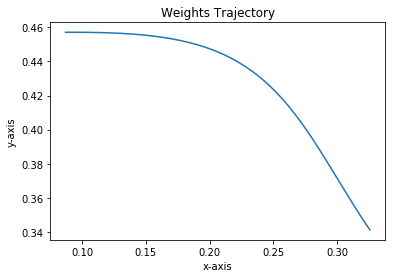

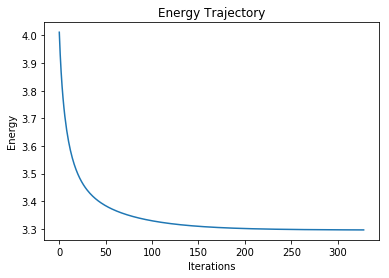

In [19]:
drawGraph(w_x,w_y,i,fn)

In [24]:
def newton(w0, eta):
    eps = math.pow(10,-4)
    i = 0
    w0 = np.array(w0)
    w = w0
    w_old = w0 - 10*eps
    init_f = f(w0)
    fn = [init_f]
    w_x = [w0[0]]
    w_y = [w0[1]]
    
    while(norm(w-w_old)>eps):
        i  = i+1
        w_old = w
        dfdx = (1/(1-w_old[0]-w_old[1]))-(1/w_old[0])
        dfdy = (1/(1-w_old[0]-w_old[1]))-(1/w_old[1])
        g = np.asarray([dfdx , dfdy]) #caclucating gardient
        
        #Calculating Hessian matrix
        d2fdx2 = math.pow((1-w_old[0]-w_old[1]),-2)+math.pow(w_old[0],-2) 
        d2fdxdy = math.pow((1-w_old[0]-w_old[1]),-2)
        d2fdydx = d2fdxdy
        d2fdy2 = math.pow((1-w_old[0]-w_old[1]),-2)+math.pow(w_old[1],-2)
        h = np.asarray([[d2fdx2, d2fdxdy], [d2fdydx, d2fdy2]])
       
        w = w - (eta*np.dot(inv(h),g)) #weight updation
        
        if (isInsideDomain(w[0],w[1])):
            w_x.append(w[0])
            w_y.append(w[1])
            fn.append(f(w))
        else:
            print("Weight outside domain.\n Restarting")
            a = random_point_within(tri)
            x = a.x
            y = a.y
            w0 = [x, y]
            print("Initial Weights:",w0)
            eta = float(input("Enter new smaller learning rate:"))
            newton(w0,eta)
    return w_x,w_y,i,w,fn


In [27]:
a1 = point_on_triangle(pt1, pt2, pt3)
x1 = a1[0]
y1 = a1[1]
w01 = w0
print("Initial weights:",w01)
eta1 = float(input("Enter the learning rate:"))
w_x1,w_y1,i1,w1,fn1 = newton(w01,eta1)
print("Final Weights:",w1)

Initial weights: [0.08685661909450604, 0.4570693848644634]
Enter the learning rate:0.01
Final Weights: [0.32436807 0.33781949]


In [64]:
print("iterations for newton:", i1)

iterations for newton: 432


In [33]:
from numpy import array
x = []
y = []
a = []
u = np.random.uniform(low=-1, high=1, size=(50,))
#print(u)
for i in range(1,51):
    #print(i)
    x.append(i)
    y.append(i)
    
for j in range(0,50):
    a.append(1) 
    y[j] = y[j]+u[j]
x1 = array(x)
x2 = np.vstack([x1,a])

In [35]:
lls = np.dot((np.dot(y,x2.T)),inv(np.dot(x2,x2.T))) #linear least squares
print("LLS weights",lls)

LLS weights [0.99778993 0.01312515]


In [37]:
def abline(slope, intercept):
    #Plot a line from slope and intercept
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color="black",linestyle="solid")

Text(0.5, 1.0, 'Linear Least Squares fit')

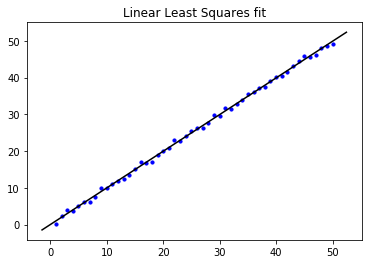

In [45]:
# plotting points as a scatter plot 
plt.scatter(x, y, color = 'blue', s=10) 

abline(lls[0],lls[1])

plt.title('Linear Least Squares fit') 



In [46]:
def f(w,x,y):
    funcn = 0
    for i in range(0,50):
        fn = fn+(math.pow((y[i]-(w[0]+(w[1]*x[i]))),2))
    return fn

In [47]:
def grad_descent(w0, eta,x,y):
    eps = math.pow(10,-6)
    j = 0
    w0 = np.array(w0)
    w = w0
    w_old = w0 - 10*eps
    #print("wold:",w_old)
    w_x = [w0[0]]
    w_y = [w0[1]]
    fn = []
    fn.append(f(w,x,y))
    while(norm(f(w_old,x,y)-f(w,x,y))>eps):
    #for b in range(0,20):       
        #print("norm;",norm(f(w_old,x,y)-f(w,x,y)))
        # print("norm:",norm(w-w_old))
        j  = j+1
        w_old = w
        dfdw0=0
        dfdw1=0
        for i in range(0,50):
            dfdw0 = dfdw0+((y[i]-(w_old[0]+(w_old[1]*x[i]))))
            dfdw1 = dfdw1+((y[i]-(w_old[0]+(w_old[1]*x[i])))*x[i])
        dfdw0 = -2*dfdw0
        dfdw1 = -2*dfdw1
        g = np.asarray([dfdw0 , dfdw1])
        #print("grad= ",g)
        w = w - (eta*g)
        fn.append(f(w,x,y))
        w_x.append(w[0])
        w_y.append(w[1])
    return w_x,w_y,j,w,fn

    
w0 = np.random.uniform(low=-1, high=1, size=(2,))
print("Initial weights=",w0)
eta = float(input("Enter the learning rate:"))
w_x,w_y,k,w,fn = grad_descent(w0[:],eta,x[:],y[:])
#print("x of w=",w_x)
#print("y of w=",w_y)
print("Final w:",w)

Initial weights= [ 0.63891985 -0.35960718]
Enter the learning rate:0.00001
Final w: [0.02616254 0.99740257]


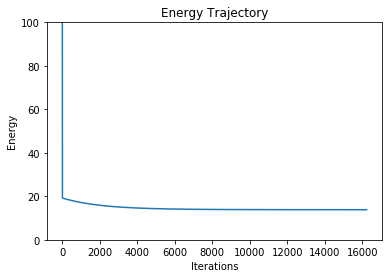

In [63]:
x3=[]
for j in range(0,k+1):
    x3.append(j)
    
plt.plot(x3, fn) 
plt.ylim([0, 100])
plt.xlabel('Iterations') 
plt.ylabel('Energy') 
plt.title('Energy Trajectory') 
plt.show() 

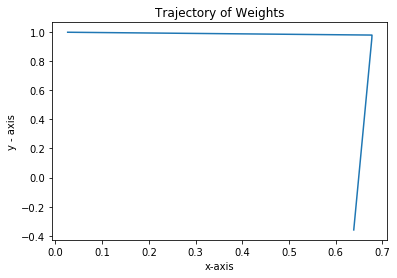

In [58]:
# plotting the points  
plt.plot(w_x, w_y) 
  
    # naming the x axis 
plt.xlabel('x-axis') 
    # naming the y axis 
plt.ylabel('y - axis') 
  
    # giving a title to my graph 
plt.title('Trajectory of Weights') 
  
    # function to show the plot 
plt.show() 